# ASSIGNMENT 07_00 Questions about ```cars_2021_raw.csv``` dataset

## Description

Based on the dataset under analysis in Assignment 04 try to elaborate an answer for the following questions.

In each case, develop the code necessary for supporting your answer and finally provide your responses in the JSON format required described later

Deliver your responses zipped in your Assigment's file submission:
* MLF_07_00 - Minigroup Number #.ipynb
* MLF_07_00_answers.json

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import tree
import scipy.stats as stats
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import (LinearRegression, Lasso, ElasticNet,
                                  Ridge, BayesianRidge)
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import (AdaBoostRegressor, GradientBoostingRegressor,
                              RandomForestRegressor)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cars_2021_v0_1.csv")
df

,Unnamed: 0,POTENCIA1 (cv),PUERTAS,PRECIO,Emisiones CO2 (gr/km),Autonomía (km),Consumo (l/100km),Garantía (meses),Motor (cc),Capacidad depósito (lts),...,Carrocería_Convertible,Carrocería_Coupe,Carrocería_Furgon,Carrocería_Monovolumen,Carrocería_Pick-Up,Carrocería_Pick-Up Doble Cabina,Carrocería_Roadster,Carrocería_Stationwagon,Carrocería_Targa,Carrocería_Todo Terreno
0,0,145,3.0,20934,155.0,583.3,6.0,30.874809,1368.0,35.0,...,0,0,0,0,0,0,0,0,0,0
1,1,145,2.0,22834,156.0,583.3,6.0,30.874809,1368.0,35.0,...,1,0,0,0,0,0,0,0,0,0
2,2,165,3.0,23934,157.0,583.3,6.0,30.874809,1368.0,35.0,...,0,0,0,0,0,0,0,0,0,0
3,3,165,2.0,25834,158.0,583.3,6.0,30.874809,1368.0,35.0,...,1,0,0,0,0,0,0,0,0,0
4,4,165,3.0,25884,157.0,583.3,6.0,30.874809,1368.0,35.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5335,5374,250,5.0,61318,163.0,1000.0,7.1,24.000000,1969.0,71.0,...,0,0,0,0,0,0,0,0,0,1
5336,5375,390,5.0,63099,48.0,3333.3,2.1,24.000000,1969.0,70.0,...,0,0,0,0,0,0,0,0,0,1
5337,5376,390,5.0,64584,48.0,3333.3,2.1,24.000000,1969.0,70.0,...,0,0,0,0,0,0,0,0,0,1
5338,5377,390,5.0,68380,48.0,3333.3,2.1,24.000000,1969.0,70.0,...,0,0,0,0,0,0,0,0,0,1


## Question 1
What price could we estimate for a car with the following features:

In [6]:
answers = {}

# MISSING: PRECIO, MODEL, VERSION1, "N° marchas"
question1 = {
    "BRAND":"Toyota",
    "POTENCIA1 (cv)":280,
    "PUERTAS":4.0,
    "COMBUSTIBLE":"Gasolina",
    "CO2":"ambar",
    "Tracción":"Tracción total permanente ",
    "Transmisión":"Automática secuencial ",
    "Emisiones CO2 (gr/km)":154.0,
    "Autonomía (km)":840.6,
    "Consumo (l/100km)":6.9,
    "Garantía (meses)":24.0,
    "Motor (cc)":1995.0,
    "Capacidad depósito (lts)":58.0,
    "Velocidad Máxima (km/h)":240.0,
    "Aceleración (0-100 km) (s)":5.2,
    "Revoluciones Potencia Máxima (rpm)":5250.0,
    "Par motor (Nm)":400.0,
    "Carrocería":"Berlina ",
    "Peso (kg)":1530.0,
    "Largo (mm)":4650.0,
    "Ancho (mm)":1860.0,
    "Alto (mm)":1438.0,
}

Explain briefly your approach...

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5340 entries, 0 to 5339
Data columns (total 100 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           5340 non-null   int64  
 1   POTENCIA1 (cv)                                       5340 non-null   int64  
 2   PUERTAS                                              5340 non-null   float64
 3   PRECIO                                               5340 non-null   int64  
 4   Emisiones CO2 (gr/km)                                5340 non-null   float64
 5   Autonomía (km)                                       5340 non-null   float64
 6   Consumo (l/100km)                                    5340 non-null   float64
 7   Garantía (meses)                                     5340 non-null   float64
 8   Motor (cc)                                           5340 non-null 

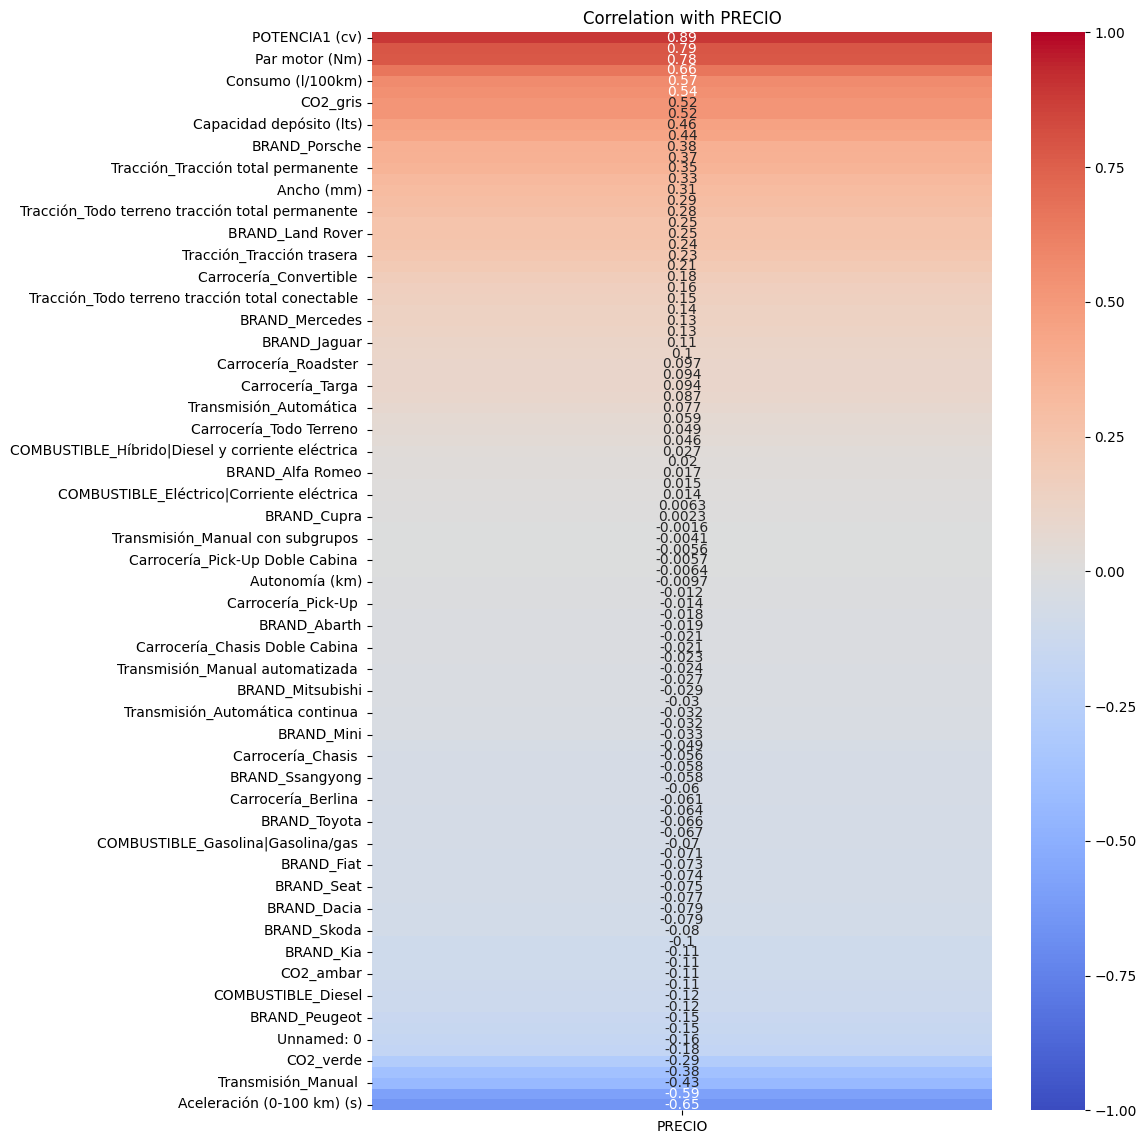

In [8]:
# Calculate the correlation matrix
corr = df.corr()

# Isolate the 'PRECIO' correlations
precio_corr = corr[['PRECIO']].drop('PRECIO', axis=0)
plt.figure(figsize=(10, 14))

# Generate a heatmap
sns.heatmap(precio_corr.sort_values(by='PRECIO', ascending=False),
            vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.title('Correlation with PRECIO')

plt.show()

The correlation heatmap shows that vehicle price is most strongly and positively influenced by engine power, torque, and engine size, with top speed, weight, fuel consumption, and CO2 emissions also positively correlated, albeit to a lesser degree. Features such as number of doors and acceleration from 0-100 km/h are negatively correlated with price, suggesting that faster or more door-equipped vehicles might not necessarily be more expensive. Features like vehicle height, and warranty period show a slight negative correlation with price, while other attributes like RPM at maximum power and vehicle range have little to no impact on pricing. This information is crucial for predicting vehicle prices and understanding market dynamics.

In [9]:
# Features (independent variables)
X = df.drop('PRECIO', axis=1)  # or another way to select your features

# Target (dependent variable)
y = df['PRECIO']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


First split the data into train(80%) and test(20%) to avoid underfitting and overfitting. After this used k-fold cross validation to evaluate the best model, ultimatley choosing random forest. Then applied the model to make price predictions based on the car's features



In [10]:
#define the size of our data sets
print("Shape of X_train :", X.shape)
print("Shape of Y_train :", y.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of Y_test :", y_test.shape)

Shape of X_train : (5340, 99)
Shape of Y_train : (5340,)
Shape of X_test : (1068, 99)
Shape of Y_test : (1068,)


              Linear: -102062684.07, 26642295.29


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.510e+11, tolerance: 3.382e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.651e+11, tolerance: 3.455e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.395e+11, tolerance: 3.453e

               Lasso: -101995693.15, 26497037.86
          ElasticNet: -149646546.07, 34038418.76
               Ridge: -102377245.37, 26866139.88
       BayesianRidge: -102225503.90, 26749493.97
                 KNN: -87170422.48, 29131762.89
        DecisionTree: -49700894.23, 19582011.79
                 SVR: -963402964.85, 143892568.51
            AdaBoost: -181762967.04, 33998019.79
       GradientBoost: -47408089.46, 12883090.86
        RandomForest: -29423279.29, 12580421.39


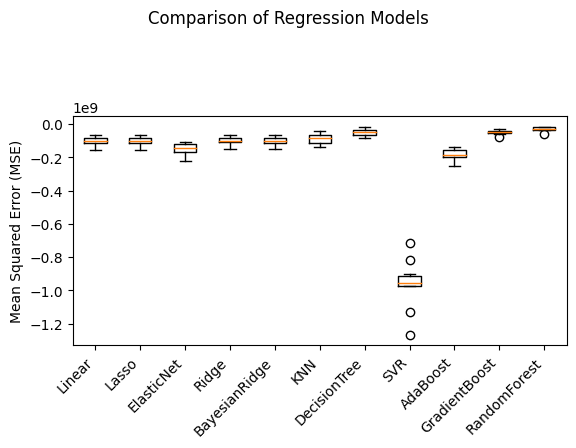

In [11]:
# Convert categorical columns to numeric
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align the columns in X_train and X_test
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

# Import required modules and suppress future warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Define model evaluation parameters
random_seed = 9
num_folds = 10
scoring_metric = "neg_mean_squared_error"

# Create a dictionary to store various regression models
regression_models = {
    "Linear": LinearRegression(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "Ridge": Ridge(),
    "BayesianRidge": BayesianRidge(),
    "KNN": KNeighborsRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "SVR": SVR(),
    "AdaBoost": AdaBoostRegressor(),
    "GradientBoost": GradientBoostingRegressor(),
    "RandomForest": RandomForestRegressor()
}

# Evaluate each model using K-fold cross-validation
results = []
model_labels = []
for name, model in regression_models.items():
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring_metric)

    results.append(cv_results)
    model_labels.append(name)
    print(f"{name:>20}: {cv_results.mean():.2f}, {cv_results.std():.2f}")

# Generate a box-whisker plot to compare the performance of the models
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('Comparison of Regression Models')
ax1 = fig.add_subplot(111)
ax1.boxplot(results)
ax1.set_xticklabels(model_labels, rotation=45, ha="right")
ax1.set_ylabel("Mean Squared Error (MSE)")
plt.tight_layout(pad=3)
plt.show()

Random Forest Model

In [12]:
# Setting up the RandomForestRegressor with specific parameters
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=21)

# Applying the model to the training dataset
random_forest_regressor.fit(X_train, y_train)

# Predicting values for the training dataset
predictions_train = random_forest_regressor.predict(X_train)

# Evaluating the model's performance on the training set using RMSE
training_rmse = np.sqrt(mean_squared_error(y_train, predictions_train))

# Displaying the RMSE for the training data
print("Training Set Model Performance")

print(f"Root Mean Squared Error: {training_rmse}")

# Predicting values for the test dataset
predictions_test = random_forest_regressor.predict(X_test)

# Evaluating the model's performance on the test set using RMSE
test_rmse = np.sqrt(mean_squared_error(y_test, predictions_test))

# Displaying the RMSE for the test data
print("Test Set Model Performance")

print(f"Root Mean Squared Error: {test_rmse}")


Training Set Model Performance
Root Mean Squared Error: 1980.4294409782672
Test Set Model Performance
Root Mean Squared Error: 5022.968296242838


In [13]:
print(f"Coefficient of Determination (R^2): {metrics.r2_score(y_test, predictions_test):.4f}")

Coefficient of Determination (R^2): 0.9735


<ipython-input-14-54a066c2bb12>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - predictions_test);


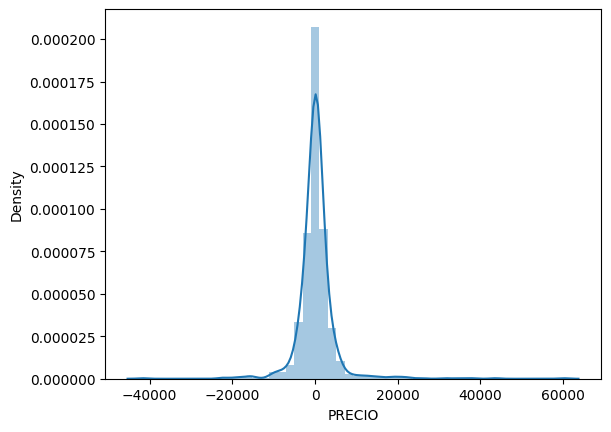

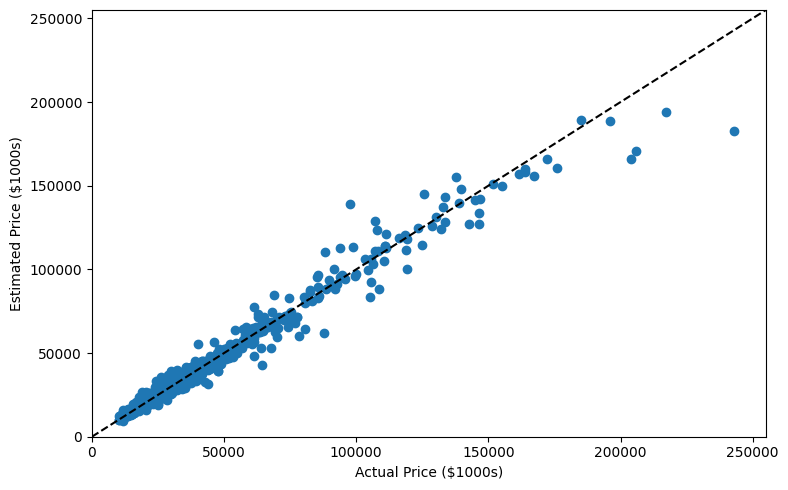

In [14]:
# Plots for error distribution
sns.distplot(y_test - predictions_test);

# Scatter plot set up
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(y_test, predictions_test)
ax.plot([0, 255000], [0, 255000], '--k')
ax.set_xlim(0, 255000)
ax.set_ylim(0, 255000)
ax.set_xlabel('Actual Price ($1000s)')
ax.set_ylabel('Estimated Price ($1000s)')

# Optimizing layout
plt.tight_layout()


Actual Price vs Estimated

In [15]:
df1 = pd.DataFrame({'Actual Price': y_test, 'Estimated Price':predictions_test})
df2 = df1.head(10)
df2

,Actual Price,Estimated Price
3365,12936,13546.17
1945,10402,12422.83
5335,61318,56787.42
4245,15251,16608.09
168,47899,50909.54
4162,27915,26328.34
4284,14783,15252.49
422,56881,55329.51
4473,28147,27297.20
296,29883,29933.11


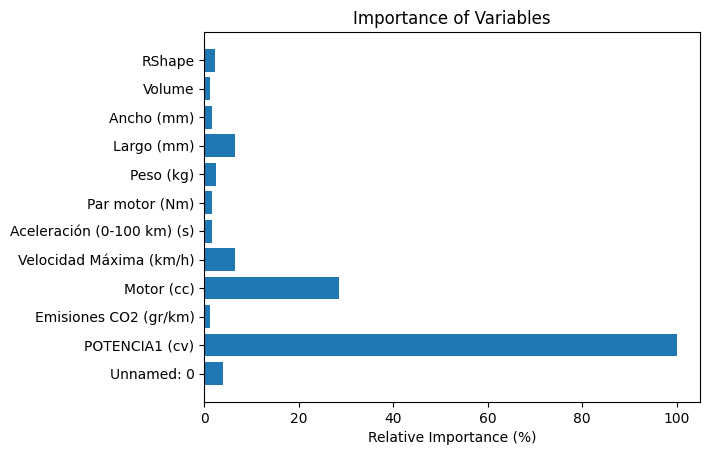

In [16]:
# Initialize and train the RandomForestRegressor
random_forest_model = RandomForestRegressor(n_estimators=100)
random_forest_model.fit(X_train, y_train)

# Compute the relative importance of features
rel_feature_importance = random_forest_model.feature_importances_
rel_feature_importance *= 100.0 / rel_feature_importance.max()

# Identify and order features by their importance
indices_sorted = np.argsort(rel_feature_importance)
positions = np.arange(len(indices_sorted)) + 0.5

# Set a threshold to identify significant features
significance_threshold = 1
significant_features = rel_feature_importance[rel_feature_importance >= significance_threshold]
significant_features_indices = np.where(rel_feature_importance >= significance_threshold)[0]
significant_features_labels = X_train.columns[significant_features_indices]

# Create a horizontal bar plot of significant feature importances
plt.barh(positions[:len(significant_features)], significant_features, align='center')
plt.yticks(positions[:len(significant_features)], significant_features_labels)
plt.xlabel('Relative Importance (%)')
plt.title('Importance of Variables')
plt.show()


Predict price for specific freatures

In [17]:
question1_df = pd.DataFrame([question1])
question1_aligned = question1_df.reindex(columns=X_train.columns, fill_value=0)
predicted_price = random_forest_model.predict(question1_aligned)

answers = {}
answers['1'] = predicted_price[0]
print("Estimated Price: ", answers['1'])

Estimated Price:  62953.71


## Question 2
What would be the expected range of prices for a a car with the following features:
* BRAND: Mercedes
* PUERTAS: 2 (two doors)
* POTENCIA1 (cv) between 200 and 300 (200 hp < power < 300 hp)

Explain briefly your approach...

In [ ]:
df = pd.read_csv("cars_2021_v0_1.csv")
df = df.loc[:,['PUERTAS', 'BRAND_Mercedes', 'POTENCIA1 (cv)', 'PRECIO']]
df.head()

,PUERTAS,BRAND_Mercedes,POTENCIA1 (cv),PRECIO
0,3.0,0,145,20934
1,2.0,0,145,22834
2,3.0,0,165,23934
3,2.0,0,165,25834
4,3.0,0,165,25884


In [ ]:
df.BRAND_Mercedes.value_counts()

BRAND_Mercedes
0    4945
1     395
Name: count, dtype: int64

#### Splitting Data

Splitting the data based on the variable we are trying to predict ('PRECIO'). We split the data into features (X) and the target variable (Y).


In [ ]:
X = df.drop(columns=['PRECIO'])
Y = df['PRECIO']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.4, random_state = 9)

#### Creating a Decision tree
Creating a decision tree classfier and fitting it to the training data. This will help to evaluate its perfomance on the data set. 'dt' is a baseline decision tree regressor.

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
dt.score(x_train, y_train)

0.921729815611905

In [ ]:
dt.score(x_test, y_test)

0.8532718753367126

The outputs of dt.score() on the test and training datasets are 0.921 and 0.851, which represent the coefficient of determination (R-squared) for this decision tree model. R-squared measures how well the regression predicts actual data points on a range from 0-1. Since these outputs are closer to 1, they indicate that a high amount of the variance is explained by the decision tree on the training and test data.

In [ ]:
dt1 = DecisionTreeRegressor(max_depth=8)
dt1.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=8)

By changing 'dt1' to level=8, we are trying to control the complexity (so making the model simpler) and trying to avoid overfitting. Before, by not specifying, we allowed for the model to look into potentially more complex relationships in the training data. Because we are aiming for a simpler, more straightford model, we are specifiying the levels.  

In [ ]:
print("training data score: " + str(dt1.score(x_train, y_train)))
print('test data score ' + str(dt1.score(x_test, y_test)))

training data score: 0.9023421229524117
test data score 0.8387910688160465


#### GridSearchCV Model

This fits the decision tree on the training data for every combination of hyperparameters ('parameters') on the grid and systematically searches through them. 'dt2' is used to find these hyperparameters.

In [ ]:
parameters = {'max_depth': [3,4,5,6,7], 'max_leaf_nodes': [2,3,4,5,6]}
dt2 = DecisionTreeRegressor()
dt2 = GridSearchCV(dt2, parameters, cv=3)

In [ ]:
dt2.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_leaf_nodes': [2, 3, 4, 5, 6]})

In [ ]:
dt2.best_params_

{'max_depth': 4, 'max_leaf_nodes': 6}

These are the best hyperparameters found by GridSearchCV, and are applied to 'dt3'.

In [ ]:
dt3 = DecisionTreeRegressor(max_depth=4, max_leaf_nodes=6)
dt3.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=6)

In [ ]:
print("training data score: " + str(dt3.score(x_train, y_train)))
print('test data score ' + str(dt3.score(x_test, y_test)))

training data score: 0.795855020940955
test data score 0.7307082538837464


These R-squared values of the training and test data are positive indicators of the models performance. Since .73 and .79 are closer to 1, meaning this model is explaining a significant portion of the variance in the datasets.

### Predicting values for price

In [ ]:
y_pred = dt3.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Predicted Price {y_pred}\n')
print(f'Mean Absolute Error of PRECIO: {mae}')
print(f'Mean Squared Error of PRECIO: {mse}')
print(f'R-squared of PRECIO: {r2}')

Predicted Price [21394.49385965 21394.49385965 30366.30777096 ... 21394.49385965
 30366.30777096 82599.20618557]

Mean Absolute Error of PRECIO: 9174.544320192983
Mean Squared Error of PRECIO: 214864256.98052847
R-squared of PRECIO: 0.7307082538837464


The example provided for Decision Tree Models originally used a confusion matrix, which is good when working with categorical target variables. Because we are using PRECIO, which is continuous, so we are using regression evaluation metrics such as Mean Absolute & Squared Error, and R squared too.

The MAE represents the average absolute difference between the predicted and actual prices, so our models predictions deviate about 9174.54 from the aactual prices.

The MSE represents the average squared differences between the predicted and actual prices, so our predictions deviate about 214864256.98 from the actual prices. However, the MSE can be very influenced by outliers, which might indicate why this is so high.

R Squared repesents the model's explanation of variances in the target variable (PRECIO), so .73 being closer to 1 means our model explains the majority of the variance in the target variable.

All of these indicate that this model works well, but not as well as it could be. The MSE and MAE could be lower and R2 could be higher.

In [ ]:
text_rep_reg = tree.export_text(dt3)
print(text_rep_reg)

|--- feature_2 <= 273.50
|   |--- feature_2 <= 179.50
|   |   |--- feature_2 <= 133.50
|   |   |   |--- value: [21394.49]
|   |   |--- feature_2 >  133.50
|   |   |   |--- value: [30366.31]
|   |--- feature_2 >  179.50
|   |   |--- value: [44650.83]
|--- feature_2 >  273.50
|   |--- feature_2 <= 426.00
|   |   |--- value: [82599.21]
|   |--- feature_2 >  426.00
|   |   |--- feature_2 <= 627.50
|   |   |   |--- value: [136850.95]
|   |   |--- feature_2 >  627.50
|   |   |   |--- value: [240673.89]



This is the textual representation of a Decision Tree Regression Model. The variable 'feature_2' representing 'POTENCIA1 (cv)' is split on 273.50. The tree first branches to the left (<=273.5) or to right (> 273.5). If it goes to the left, it is evaluated and split again at 179.5 and 133.5. If it goes to the right, it is evaluated at 456.0 and 627.5. Depending on what 'feature_2' is, you get as assigned predicted value for the price.   

#### Final answer

In [ ]:
input_data = pd.DataFrame({
    'PUERTAS': [2],
    'BRAND_Mercedes': [1],
    'POTENCIA1 (cv)': [250]
})

prediction = dt3.predict(input_data)
print(f'Predicted Price: {prediction}')

Predicted Price: [44650.82634731]


The answer to the original question of the price of a car with from the brand Mercedes, 2 doors, and a horsepower between 200-300 (we used 250) is about 44650.86 euros.  

In [ ]:
answers['2']={'PRICE': 44650.82634731}

### Visualization

This is a visual representation of the Decision Tree Model. This model has nodes (every box is a node), edges (which are the lines between nodes), leaves (the final decisions/predictions made in the model). Each node has a feature condition based on 'POTENCIA1 (cv)' where it makes a decision to go left or right. The depth of this tree is shown to be 4, which we defined while first creating the Tree and defining its parameters ({'max_depth': 4, 'max_leaf_nodes': 6}), along with the number of leave nodes (6).

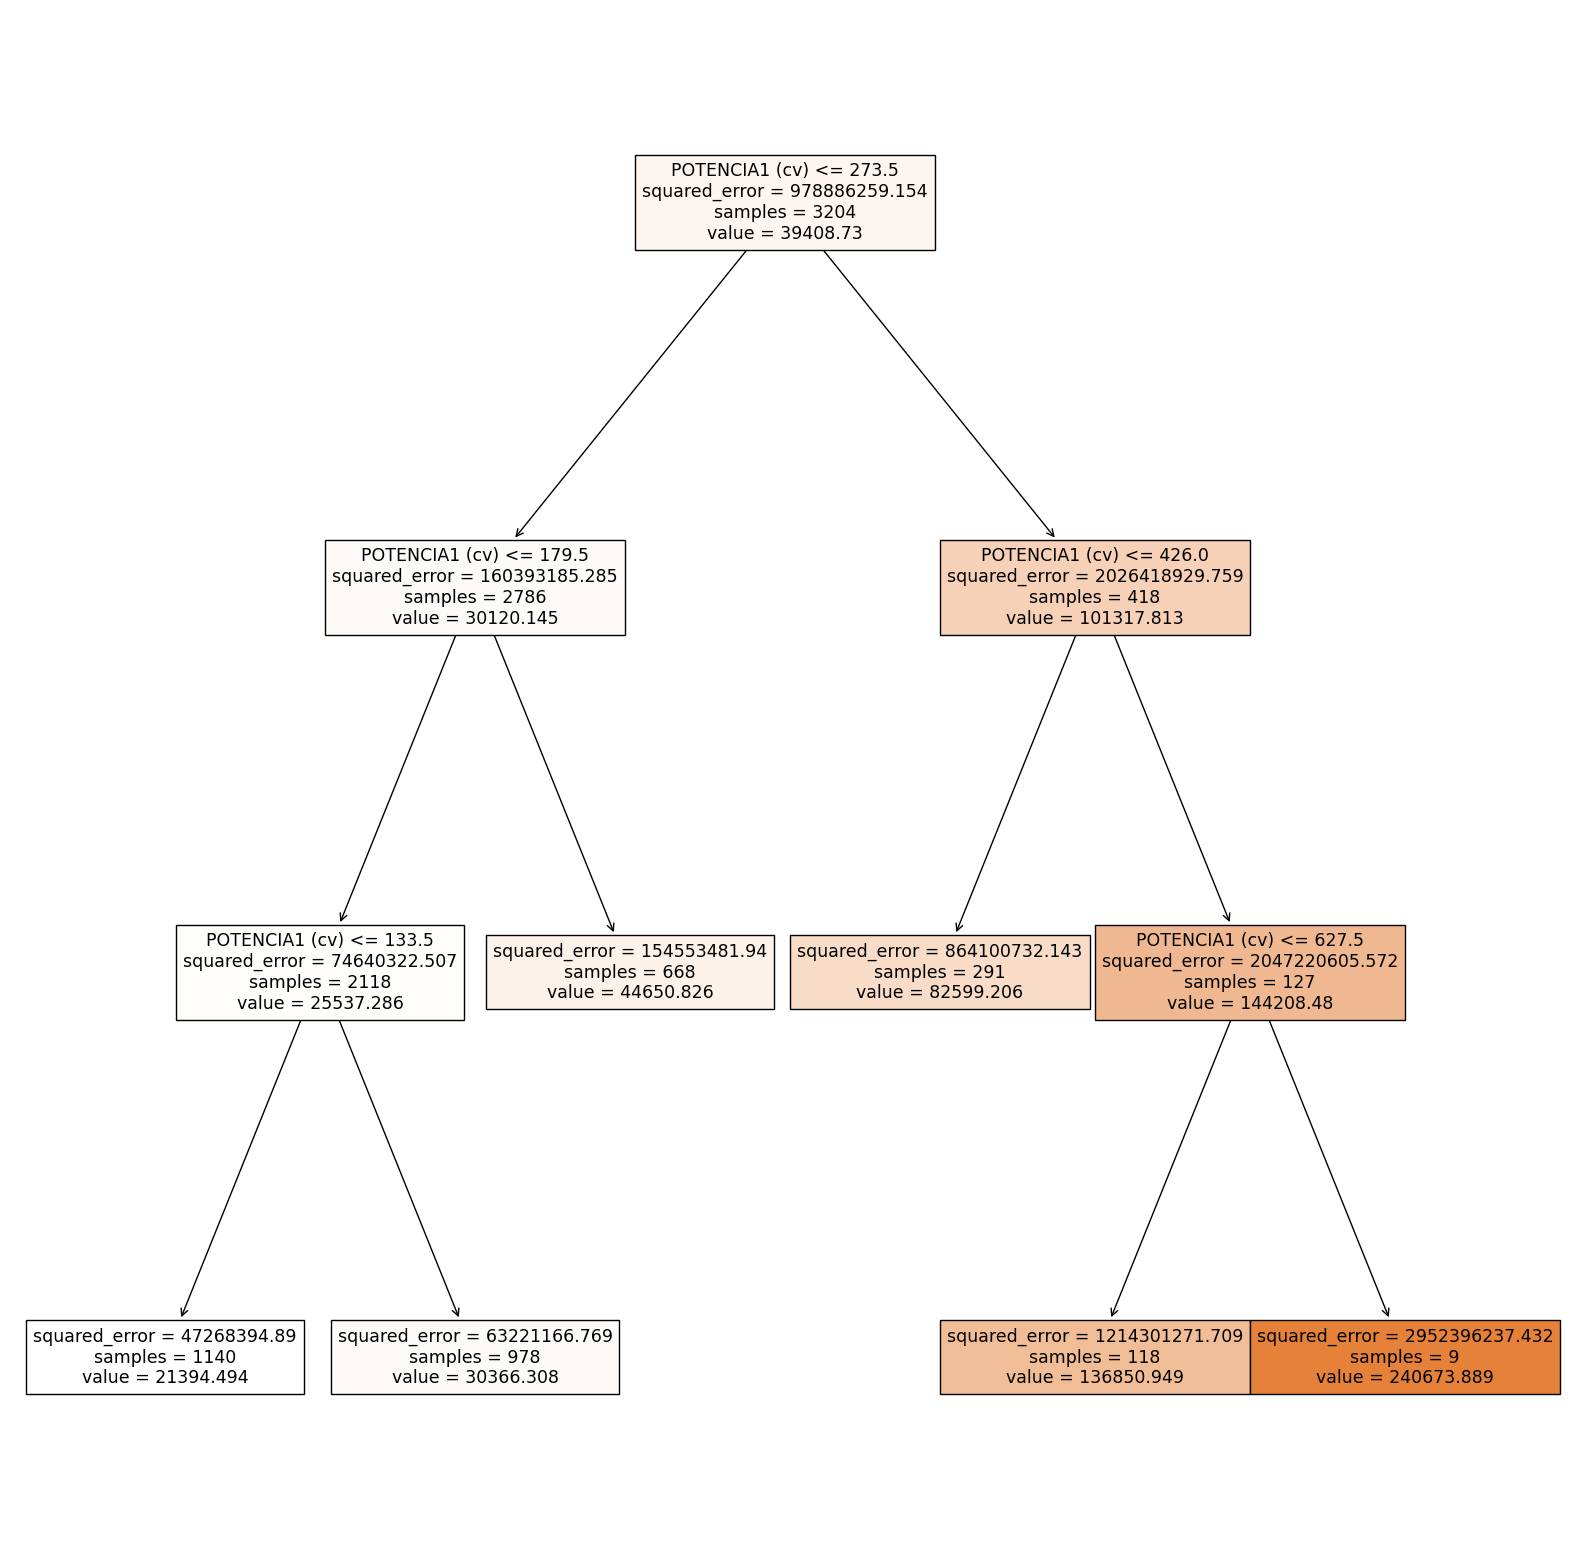

In [ ]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt3,
               feature_names=x_train.columns,
               filled=True,
               impurity=True
              )
plt.show()

## Question 3
If a given car weights 1500 kg (```Peso (kg)```) and is 4600 mm long (```Largo (mm)```), 1900 mm wide (```Ancho (mm)```) and 1400 mm tall (```Alto (mm)```), what could be its body type (```Carrocería```) (assign probabilities to your opinion)

In [ ]:
question3 = {
    "Peso (kg)":1500.0,
    "Largo (mm)":4600.0,
    "Ancho (mm)":1900.0,
    "Alto (mm)":1400.0
}

### Preliminary analysis

In supervised learning, the problem of predicting a class is called classification. This is the type of problem we are addressing in this question as we are trying to predict a categorical variable.
There are several models we can consider for this type of problem, decision trees, KN Neartest neighbours, SVM...

Lets first have a look at our data

In [ ]:
df = pd.read_csv("cars_2021_v0_2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5340 entries, 0 to 5339
Data columns (total 86 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           5340 non-null   int64  
 1   POTENCIA1 (cv)                                       5340 non-null   int64  
 2   PUERTAS                                              5340 non-null   float64
 3   PRECIO                                               5340 non-null   int64  
 4   Emisiones CO2 (gr/km)                                5340 non-null   float64
 5   Autonomía (km)                                       5340 non-null   float64
 6   Consumo (l/100km)                                    5340 non-null   float64
 7   Garantía (meses)                                     5340 non-null   float64
 8   Motor (cc)                                           5340 non-null  

In [ ]:
df.loc[:,['Peso (kg)', 'Largo (mm)', 'Ancho (mm)', 'Alto (mm)', 'Carrocería']]

,Peso (kg),Largo (mm),Ancho (mm),Alto (mm),Carrocería
0,1110.0,3660.0,1627.0,1480.0,Berlina
1,1150.0,3660.0,1627.0,1480.0,Convertible
2,1110.0,3660.0,1627.0,1485.0,Berlina
3,1150.0,3660.0,1627.0,1485.0,Convertible
4,1110.0,3660.0,1627.0,1485.0,Berlina
...,...,...,...,...,...
5335,2004.0,4950.0,2008.0,1776.0,Todo Terreno
5336,2350.0,4950.0,2008.0,1776.0,Todo Terreno
5337,2350.0,4950.0,2008.0,1776.0,Todo Terreno
5338,2350.0,4950.0,2008.0,1776.0,Todo Terreno


An observation we can make:
* We have many columns in the data some of which we are NOT using as predictors
* We have quite a few data points so this is something be something we should take into account when deciding what algorithm to use

Out of the ones mentioned in the beguining, due to the above, we are going to try KN neighbours first and if it doesnt yield good enough resulrs we will shitch to Naive Bayes.

### KN Nearest Neighbours

2 things worth mentioning:
* We will not dummify Carrocería as for this algorithm it is the targuet variable and can be handled in its categorical nature.
* The data is not normalized, so we need to normalize it before we can use it to make predictions --> we will do this after the split to avoid data leackage

In [ ]:
"""Here we will be creating our train and test data with a 80/20 split.
We will also scale the data to avoid the model to be biased."""

# Splitting the data into features and target variable
X = df.loc[:,['Peso (kg)', 'Largo (mm)', 'Ancho (mm)', 'Alto (mm)']] # we will only keep features we are interested in
Y = df['Carrocería']

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

# Now we are going to scale to avoid the model to be biased
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Now we are going to train the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) # We are going to use 5 neighbors as a starring point
knn.fit(X_train, Y_train)

KNeighborsClassifier()

The model should now be trained. Lets go ahead and try to make some predictions.

In [ ]:
from sklearn.metrics import accuracy_score
# Predicting on the test set
Y_pred = knn.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)

print(f'Accuracy of the model: {accuracy}')

Accuracy of the model: 0.8586142322097379


This is quite a good score but, we may be able to make it even better!

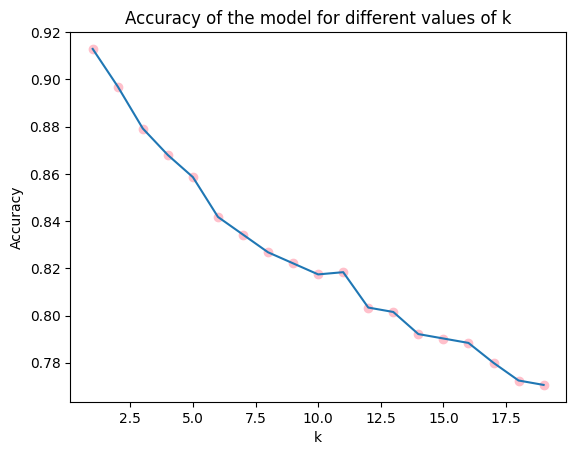

In [ ]:
# Something we can adjust is the value of k.
accuracies_list = []
k_options = range(1, 20)

# trying different values of k
for k in k_options:
     knn = KNeighborsClassifier(n_neighbors=k)
     knn.fit(X_train, Y_train)
     accuracy = accuracy_score(Y_test, knn.predict(X_test))
     accuracies_list.append(accuracy)

# Visualizing the accuracy of the model
plt.plot(k_options, accuracies_list)
plt.title('Accuracy of the model for different values of k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.scatter(k_options, accuracies_list, color='pink')

In [ ]:
# Now lets try training again with the best value of k
knn = KNeighborsClassifier(n_neighbors=3) # We are going to use 3  (we will chose this as the first value of k that is balanced because we dont want to overfit)
knn.fit(X_train, Y_train)

# Predicting on the test set
y_pred = knn.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy of the model: {accuracy}')

Accuracy of the model: 0.8792134831460674


Much better! Now that we are satisfied with the accuracy of the model, we can use it to make predictions

In [ ]:
# We are going to scale the input data
# Now we are going to predict the body type
input_data = pd.DataFrame(question3, index=[0])
input_data = scaler.transform(input_data)
prediction = knn.predict(input_data)
probabilities = knn.predict_proba(input_data)
print(f'The predicted body type is: {prediction}')
for body_type, prob in zip(knn.classes_, probabilities[0]):
    print(f"{body_type}: {prob:.2f}")

The predicted body type is: ['Berlina ']
Berlina : 1.00
Bus : 0.00
Chasis : 0.00
Chasis Doble Cabina : 0.00
Combi : 0.00
Convertible : 0.00
Coupe : 0.00
Furgon : 0.00
Monovolumen : 0.00
Pick-Up : 0.00
Pick-Up Doble Cabina : 0.00
Roadster : 0.00
Stationwagon : 0.00
Targa : 0.00
Todo Terreno : 0.00


So we can see the model appears suspiciously confident in the prediction. If we tweek the values we are predicting we see that we always get 0's and 1's (tested out separately so this code cannot be viewed here but please try it!). This is a clear case of overfittig.

If we go back to our neighbour selection: we are now using only 3 neighbours for about 5000 data points. Lets expand and see if we get better predictions.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9) # We are going to use 9 as a good compromise between overfitting and underfitting and considering the plot we made
knn.fit(X_train, Y_train)

# Predicting on the test set
y_pred = knn.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy of the model: {accuracy}')

input_data = pd.DataFrame(question3, index=[0])
input_data = scaler.transform(input_data)
prediction = knn.predict(input_data)
probabilities = knn.predict_proba(input_data)
print(f'The predicted body type is: {prediction}')
for body_type, prob in zip(knn.classes_, probabilities[0]):
    print(f"{body_type}: {prob:.2f}")

Accuracy of the model: 0.8220973782771536
The predicted body type is: ['Berlina ']
Berlina : 0.89
Bus : 0.00
Chasis : 0.00
Chasis Doble Cabina : 0.00
Combi : 0.00
Convertible : 0.00
Coupe : 0.11
Furgon : 0.00
Monovolumen : 0.00
Pick-Up : 0.00
Pick-Up Doble Cabina : 0.00
Roadster : 0.00
Stationwagon : 0.00
Targa : 0.00
Todo Terreno : 0.00


It works! We can see that our model is now making solid predictions at a 0.82 accuracy

In [ ]:
# Precision
from sklearn.metrics import precision_score, recall_score

precision = precision_score(Y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(Y_test, y_pred, average='weighted')
print(f'Precision of the model: {precision}')
print(f'Recall of the model: {recall}')

Precision of the model: 0.8214259130568459
Recall of the model: 0.8220973782771536


We have been very lucky in that it seems that we have tunned our parameteres in a way that minimises false positives and false negatives whilst correctky rpeicting the majority of the values. We can hence be satisfied with our prediction and save it as our definite answer.

In [ ]:
answers['3']={'BODY TYPE': 'Berlina ', 'PROBABILITY': 0.89}

### Save your answers

In [ ]:
import json
with open("MLF_07_00_answers.json", 'w') as fp:
    json.dump(answers, fp, indent=4)

### Example of answers

In [ ]:
answers = {}
answers['1'] = 0.0
answers['2']= {'PRICE': 1.0, 'RANGE': 2.0}
answers['3']= {'BODY TYPE': 'WHATEVER', 'PROBABILITY': 0.25}

import json
with open("MLF_07_00_answers_dummy.json", 'w') as fp:
    json.dump(answers, fp, indent=4)
"""
{
    "1": 0.0,
    "2": {
        "PRICE": 1.0,
        "RANGE": 2.0
    },
    "3": {
        "BODY TYPE": "WHATEVER",
        "PROBABILITY": 0.25
    }
}
"""